# SGD

* lets say row n = 1000
* col = 5 -> 6 coef
* epochs -> 50

* so the total derivative would be 6 * 1000 * 50 

* similarly for n = 10^5 , col -> 10^2 , epochs = 10^3 then total derivaties = 10^10  

* which makes our algorithm very slow for big data 
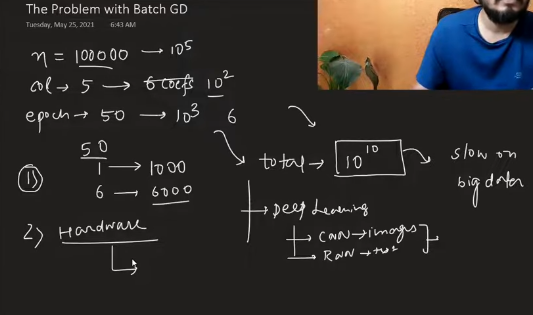

* also to load such vast amount of data into ram to calculate the derivatev of the matrix is also not possible for big data


* hardware requirement fail karne ke bahut chance hai ..

### in stochastic we update looking a single row and similary we update for n(row) no. of times  in a single epochs..

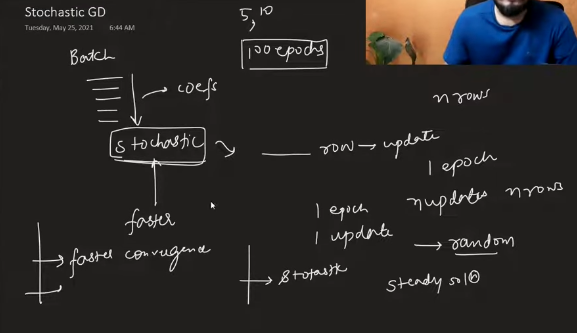

* so it takes less epochs to reach the answer
* it can be easly loaded into the RAM for calculation as its size is very low ( one row at a time) 
* thats why hardware requirment me ye kabhi fail nhi karta , to kabhi fatega nhi..
* in Stochastic we chose random row from the dataset (not the first row then second row ) we chose random row
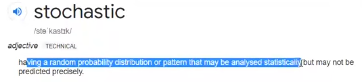

* we dont get steady answer so every time we apply stochastic we get different answer as we chose random row so each time the answer it gives different but close to the real answer( halka sa impreccisize)

In [2]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
X,y = load_diabetes(return_X_y=True)

In [4]:
print(X.shape)
print(y.shape) 

(442, 10)
(442,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [6]:
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [7]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [ ]:
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.4399338661568968

In [9]:
X_train.shape

(353, 10)

In [10]:
class SGDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1]) # creating a one matrix of column size
        
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0,X_train.shape[0]) #selecting a random index 
                
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_ #calculating for that particular row
                
                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der) #main
                
                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der) #main
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [11]:
sgd = SGDRegressor(learning_rate=0.01, epochs=40)

In [15]:
import time

In [16]:
start = time.time()
sgd.fit(X_train, y_train)
print("Time taken is", time.time() - start)

151.36683105875898 [  50.36525849  -48.71870318  320.77389596  224.38239974   29.04545826
  -10.12100457 -166.14285417  133.8518247   290.37617406  130.56355031]
Time taken is 0.9948608875274658


In [13]:
y_pred = sgd.predict(X_test)

In [14]:
r2_score(y_test, y_pred)

0.4212049344452038

# batch vs stochastic 
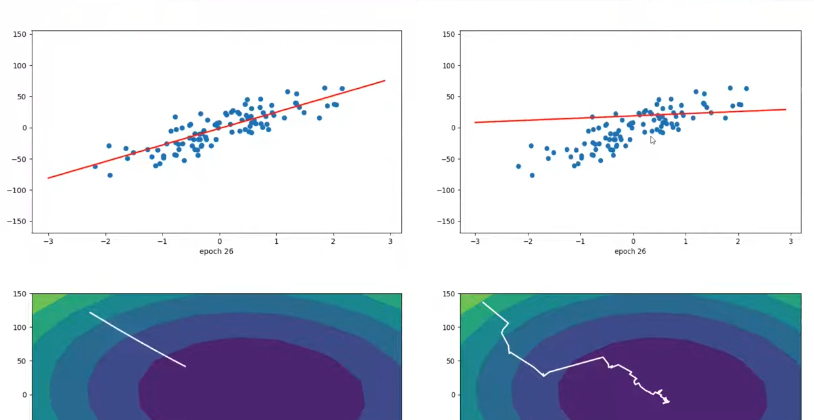

* in batch on every epochs we are  standing at a better position then before 
* where as sgd doesnot gurantee that step no. n+1 can be worst then step n (where u r standing now may be not better then previous step)

## when to use SGD
* when dealing with big data
* when theres a non-convex function, batch gradient descent might not work as it can stuck at local minima , where as sgd can come out of local minima and go to global minima
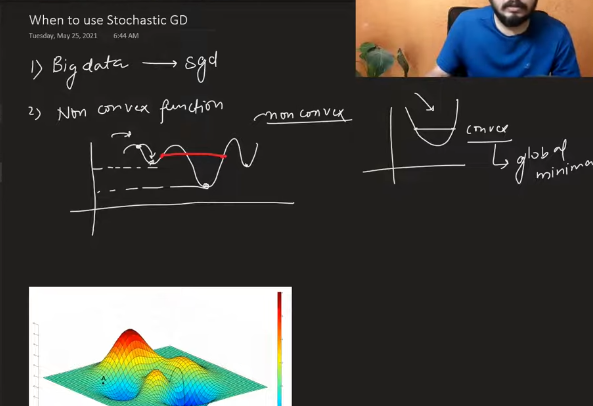

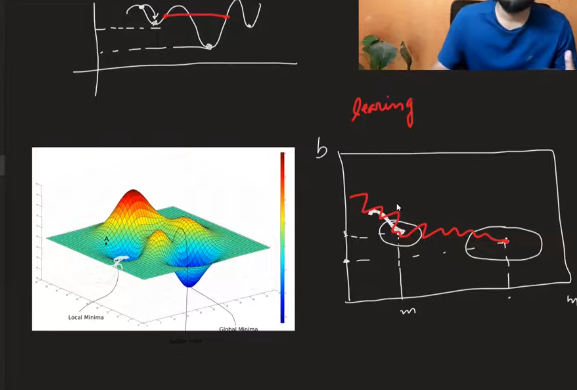

* in sgd even after reaching at the global minima it still fluctuate 

### learning schedule
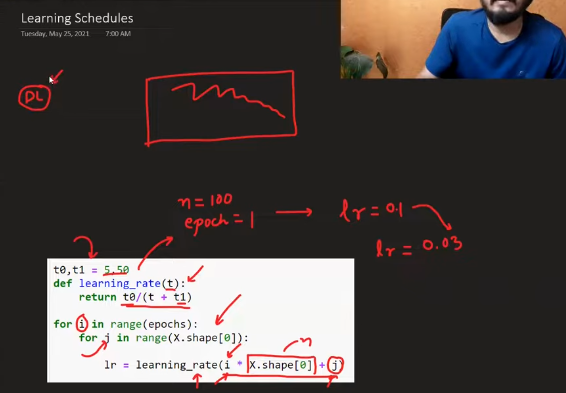